# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline
import alpaca_trade_api as tradeapi



In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url= btc_url + "?format=json"
eth_url= eth_url + "?format=json"
requests.get(btc_url)
requests.get(eth_url)

<Response [200]>

In [6]:
# Fetch current ETH price
response_eth = requests.get(eth_url).json()
#response_content = response_eth.content
#data_eth = response_eth.json()
print(json.dumps(response_eth , indent = 4) )
print("-----------------")
response_btc = requests.get(btc_url).json()

print(json.dumps(response_btc , indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116105630,
            "total_supply": 116105630,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2724.82,
                    "volume_24h": 44868121660,
                    "market_cap": 317018393957,
                    "percentage_change_1h": 1.32192982820099,
                    "percentage_change_24h": 14.4721349725468,
                    "percentage_change_7d": 3.20658651056739,
                    "percent_change_1h": 1.32192982820099,
                    "percent_change_24h": 14.4721349725468,
                    "percent_change_7d": 3.20658651056739
                }
            },
            "last_updated": 1622507077
        }
    },
    "metadata": {
        "timestamp": 1622507077,
        "num_crypto

In [7]:
my_btc_value = response_btc["data"]["1"]["quotes"]["USD"]["price"]*my_btc
print(my_btc_value)
my_eth_value = response_eth["data"]["1027"]["quotes"]["USD"]["price"]*my_eth
print(my_eth_value)

45106.799999999996
14441.546


In [8]:
# Compute current value of my crpto


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45106.80
The current value of your 5.3 ETH is $14441.55


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")


In [11]:
# Format current date as ISO format
timeframe = "1D"
start_date = pd.Timestamp("2020-05-28",tz="America/New_york").isoformat()
end_date = pd.Timestamp("2020-05-28",tz="America/New_york").isoformat()


In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
            tickers,
            timeframe,
            start = start_date,
            end = end_date,
            
).df

# Preview DataFrame
df_ticker

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2020-05-28 00:00:00-04:00  117.14  117.35  112.24  117.33  18488400  304.65   

                                                              
                             high     low   close     volume  
time                                                          
2020-05-28 00:00:00-04:00  306.84  302.24  302.96  159401239

In [13]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.33
Current SPY closing price: $302.96


In [14]:
# Compute the current value of shares
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15148.00
The current value of your 200 AGG shares is $23466.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000
df_savings = pd.DataFrame()
# Create savings DataFrame
df_savings["amount"] = [(my_spy_value+my_agg_value),(my_btc_value+my_eth_value)]
df_savings.index = ['Shares',"Crypto"]
# Display savings DataFrame
display(df_savings)

,amount
Shares,38614.000
Crypto,59548.346


array([<AxesSubplot:ylabel='amount'>], dtype=object)

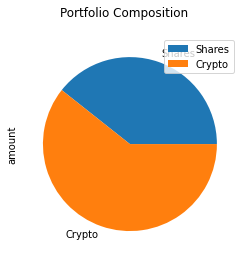

In [16]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True,title="Portfolio Composition")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = my_spy_value+my_agg_value + my_btc_value+my_eth_value


# Validate saving health
if total_saving > emergency_fund:
    print(f"congratulating the person for having enough money in this fund.")
elif total_saving == emergency_fund:
    print(f"congratulating the person on reaching this financial goal.")
else:
    print(f"{emergency_fund - total_saving} dollars away the person is from reaching the goal.") 

congratulating the person for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-03-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-03-28', tz='America/New_York').isoformat()
print(start_date)
print(end_date)

2015-03-28T00:00:00-04:00
2020-03-28T00:00:00-04:00


In [32]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_barset(
                tickers,
                timeframe,
                start = start_date,
                end = end_date,
                limit =1000
            
).df

# Display sample data
df_stock_data

AGG                                          \
                             open     high       low    close      volume   
time                                                                        
2016-04-07 00:00:00-04:00  110.98  111.050  110.7700  110.990   1608325.0   
2016-04-08 00:00:00-04:00  111.00  111.000  110.8100  110.860   2197078.0   
2016-04-11 00:00:00-04:00  110.87  110.960  110.7600  110.945   1574840.0   
2016-04-12 00:00:00-04:00  110.85  110.860  110.6500  110.770   1819807.0   
2016-04-13 00:00:00-04:00  110.74  110.915  110.6800  110.820   1581593.0   
...                           ...      ...       ...      ...         ...   
2020-03-23 00:00:00-04:00  109.90  112.940  109.0000  112.550  23873510.0   
2020-03-24 00:00:00-04:00  111.52  113.500  111.0754  113.290  18141498.0   
2020-03-25 00:00:00-04:00  114.00  114.750  113.7000  114.690  19069540.0   
2020-03-26 00:00:00-04:00  114.20  115.390  114.2000  114.900  26550536.0   
2020-03-27 00:00:00-04:00  114.78  115.580  114.5300  115.580  13671640.0   

                              SPY                                         
                             open      high     low   close       volume  
time                                                                      
2016-04-07 00:00:00-04:00     NaN       NaN     NaN     NaN          NaN  
2016-04-08 00:00:00-04:00  205.34  205.8500  203.87  204.53   72436945.0  
2016-04-11 00:00:00-04:00  205.25  206.0700  203.91  203.98   65845247.0  
2016-04-12 00:00:00-04:00  204.22  206.2500  203.70  205.94   82558999.0  
2016-04-13 00:00:00-04:00  207.00  208.1000  206.84  208.02   77593294.0  
...                           ...       ...     ...     ...          ...  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712.0  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249.0  
2020-03-25 00:00:00-04:00  244.87  256.3500  239.75  246.77  277138668.0  
2020-03-26 00:00:00-04:00  249.52  262.8000  249.05  261.39  221727030.0  
2020-03-27 00:00:00-04:00  253.27  260.8100  251.05  253.39  191462093.0  

[1001 rows x 10 columns]

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
                portfolio_data = df_stock_data ,
                weights= [0.40,0.60],
                num_simulation=500,
                num_trading_days=252*30
)

In [34]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2016-04-07 00:00:00-04:00  110.98  111.050  110.77  110.990  1608325.0   
2016-04-08 00:00:00-04:00  111.00  111.000  110.81  110.860  2197078.0   
2016-04-11 00:00:00-04:00  110.87  110.960  110.76  110.945  1574840.0   
2016-04-12 00:00:00-04:00  110.85  110.860  110.65  110.770  1819807.0   
2016-04-13 00:00:00-04:00  110.74  110.915  110.68  110.820  1581593.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-04-07 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-04-08 00:00:00-04:00    -0.001171  205.34  205.85  203.87  204.53   
2016-04-11 00:00:00-04:00     0.000767  205.25  206.07  203.91  203.98   
2016-04-12 00:00:00-04:00    -0.001577  204.22  206.25  203.70  205.94   
2016-04-13 00:00:00-04:00     0.000451  207.00  208.10  206.84  208.02   

                                                    
                               volume daily_return  
time                                                
2016-04-07 00:00:00-04:00         NaN          NaN  
2016-04-08 00:00:00-04:00  72436945.0          NaN  
2016-04-11 00:00:00-04:00  65845247.0    -0.002689  
2016-04-12 00:00:00-04:00  82558999.0     0.009609  
2016-04-13 00:00:00-04:00  77593294.0     0.010100

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988926,0.993174,0.997607,0.996774,0.988200,0.990670,1.007395,1.010630,1.015521,1.007393,...,1.004333,0.995012,0.992809,0.988669,1.004481,1.007699,0.999039,1.001340,0.995406,1.002285
2,0.989133,0.986147,1.009604,0.999057,0.985013,0.997088,1.015153,1.012269,1.021592,1.019319,...,1.006646,0.988559,0.986134,0.986682,0.995609,1.003951,1.006389,0.994136,0.987942,0.998503
3,0.997014,0.978824,1.003932,0.999709,0.976252,1.011960,1.019242,1.022272,1.031065,1.013008,...,1.005855,0.989128,0.989380,0.983430,0.981284,0.996555,0.996667,0.988048,0.997285,0.991455
4,0.996610,0.986745,1.000171,1.008574,0.993966,1.012966,1.026659,1.026833,1.019072,1.030160,...,0.992761,0.978070,0.987854,0.990104,0.975242,1.002946,1.002729,0.984541,1.007471,0.983341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.905779,5.328874,3.982341,1.665006,2.348166,3.312365,2.477932,2.296148,4.836993,3.387218,...,3.302104,1.211474,2.837820,4.106962,1.290729,3.054484,10.078259,7.981507,4.598294,3.896236
7557,3.895956,5.376686,3.983795,1.671381,2.349925,3.331409,2.467071,2.304298,4.826780,3.416883,...,3.244021,1.214730,2.881459,4.078957,1.291745,3.031642,10.100817,8.019751,4.589926,3.926377
7558,3.895781,5.337122,4.025195,1.678043,2.354773,3.328786,2.466846,2.288281,4.786069,3.444694,...,3.245043,1.236398,2.915592,4.093695,1.285942,3.014145,10.018154,8.014079,4.558619,3.927766
7559,3.924400,5.282010,4.017476,1.669695,2.360281,3.343932,2.462886,2.279249,4.799844,3.445549,...,3.217515,1.232992,2.930528,4.043025,1.304528,3.023344,10.042718,8.049549,4.488249,3.936526


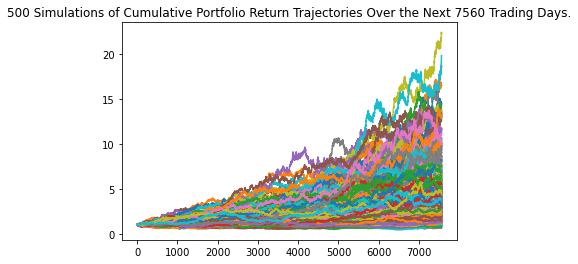

In [36]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

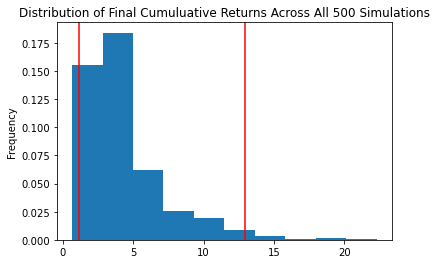

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              4.329001
std               2.950116
min               0.665040
25%               2.424502
50%               3.505820
75%               5.144906
max              22.277759
95% CI Lower      1.121667
95% CI Upper     12.952128
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000
simulated_returns_data = {
    "mean": list(MC_thirtyyear.simulated_return.mean(axis=1)),
    "median": list(MC_thirtyyear.simulated_return.median(axis=1)),
    "min": list(MC_thirtyyear.simulated_return.min(axis=1)),
    "max": list(MC_thirtyyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000041,1.000142,0.973745,1.020792
2,0.999914,0.999586,0.969018,1.029682
3,1.000377,1.000129,0.963894,1.035072
4,1.000978,1.000396,0.958755,1.059812
...,...,...,...,...
7556,4.321210,3.507002,0.665315,22.228524
7557,4.322676,3.538050,0.660832,22.139975
7558,4.324057,3.537501,0.669778,22.404957
7559,4.327672,3.520479,0.667880,22.221845


In [41]:
cumulative_pnl = initial_investment*df_simulated_returns

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22433.33 and $259042.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5
simulated_returns_data = {
    "mean": list(MC_thirtyyear.simulated_return.mean(axis=1)),
    "median": list(MC_thirtyyear.simulated_return.median(axis=1)),
    "min": list(MC_thirtyyear.simulated_return.min(axis=1)),
    "max": list(MC_thirtyyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
cumulative_pnl = initial_investment*df_simulated_returns
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33650.0 and $388563.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
                portfolio_data = df_stock_data ,
                weights= [0.40,0.60],
                num_simulation=500,
                num_trading_days=252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2016-04-07 00:00:00-04:00  110.98  111.050  110.77  110.990  1608325.0   
2016-04-08 00:00:00-04:00  111.00  111.000  110.81  110.860  2197078.0   
2016-04-11 00:00:00-04:00  110.87  110.960  110.76  110.945  1574840.0   
2016-04-12 00:00:00-04:00  110.85  110.860  110.65  110.770  1819807.0   
2016-04-13 00:00:00-04:00  110.74  110.915  110.68  110.820  1581593.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-04-07 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-04-08 00:00:00-04:00    -0.001171  205.34  205.85  203.87  204.53   
2016-04-11 00:00:00-04:00     0.000767  205.25  206.07  203.91  203.98   
2016-04-12 00:00:00-04:00    -0.001577  204.22  206.25  203.70  205.94   
2016-04-13 00:00:00-04:00     0.000451  207.00  208.10  206.84  208.02   

                                                    
                               volume daily_return  
time                                                
2016-04-07 00:00:00-04:00         NaN          NaN  
2016-04-08 00:00:00-04:00  72436945.0          NaN  
2016-04-11 00:00:00-04:00  65845247.0    -0.002689  
2016-04-12 00:00:00-04:00  82558999.0     0.009609  
2016-04-13 00:00:00-04:00  77593294.0     0.010100

In [46]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006061,1.002343,0.995253,0.997563,0.999032,1.004625,1.003579,1.009338,0.994482,0.996322,...,1.001514,1.000481,1.004041,1.000821,0.987849,0.999206,1.005828,1.006708,1.003075,1.005344
2,1.004848,0.997501,0.996047,0.983338,1.011104,0.996381,0.997820,1.015751,1.004978,0.992340,...,0.996434,1.003906,0.994207,1.005564,0.978828,0.986259,1.009216,1.007693,1.000972,1.000416
3,1.007243,0.992402,1.000752,0.976078,1.008255,1.007434,1.008475,1.000428,1.013952,0.991808,...,0.981572,1.008946,0.989556,0.999384,0.978265,0.989103,1.003893,1.015099,0.992738,0.999965
4,1.008531,0.997828,0.999654,0.970591,1.006631,1.001770,1.012745,1.013178,1.009664,1.001831,...,0.978181,1.005367,0.978237,0.998722,0.981295,0.982886,1.008084,1.006071,0.995498,1.016177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.296107,1.590366,1.497183,1.018384,1.153514,0.975686,1.541426,1.290168,1.887437,1.065468,...,1.362824,1.041294,1.368494,1.525380,0.811577,1.101684,0.961728,0.786528,1.257943,1.550725
1257,1.295557,1.584531,1.499527,1.025803,1.156344,0.971735,1.537936,1.297110,1.890793,1.065999,...,1.363117,1.039395,1.385783,1.535395,0.818276,1.106256,0.958226,0.780635,1.248991,1.558836
1258,1.280536,1.568920,1.504780,1.029967,1.166765,0.966362,1.540129,1.294799,1.900453,1.056944,...,1.374171,1.047514,1.388390,1.531604,0.825201,1.100900,0.949570,0.773220,1.252032,1.559329
1259,1.296592,1.557150,1.491754,1.033238,1.176469,0.969333,1.530225,1.303687,1.898395,1.061366,...,1.367097,1.042361,1.384132,1.531547,0.819830,1.114810,0.959518,0.757752,1.241235,1.573912


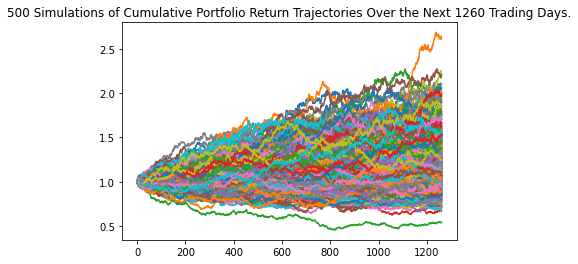

In [47]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

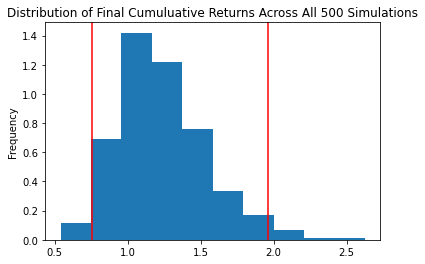

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.234540
std               0.305714
min               0.539741
25%               1.020773
50%               1.196201
75%               1.422791
max               2.624398
95% CI Lower      0.754738
95% CI Upper      1.960131
Name: 1260, dtype: float64


In [50]:
# Set initial investment

initial_investment = 20000
simulated_returns_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
cumulative_pnl = initial_investment*df_simulated_returns
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15094.76 and $39202.61


### Ten Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
                portfolio_data = df_stock_data ,
                weights= [0.40,0.60],
                num_simulation=500,
                num_trading_days=252*10
)
MC_fiveyear.portfolio_data.head()

AGG                                       \
                             open     high     low    close     volume   
time                                                                     
2016-04-07 00:00:00-04:00  110.98  111.050  110.77  110.990  1608325.0   
2016-04-08 00:00:00-04:00  111.00  111.000  110.81  110.860  2197078.0   
2016-04-11 00:00:00-04:00  110.87  110.960  110.76  110.945  1574840.0   
2016-04-12 00:00:00-04:00  110.85  110.860  110.65  110.770  1819807.0   
2016-04-13 00:00:00-04:00  110.74  110.915  110.68  110.820  1581593.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-04-07 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-04-08 00:00:00-04:00    -0.001171  205.34  205.85  203.87  204.53   
2016-04-11 00:00:00-04:00     0.000767  205.25  206.07  203.91  203.98   
2016-04-12 00:00:00-04:00    -0.001577  204.22  206.25  203.70  205.94   
2016-04-13 00:00:00-04:00     0.000451  207.00  208.10  206.84  208.02   

                                                    
                               volume daily_return  
time                                                
2016-04-07 00:00:00-04:00         NaN          NaN  
2016-04-08 00:00:00-04:00  72436945.0          NaN  
2016-04-11 00:00:00-04:00  65845247.0    -0.002689  
2016-04-12 00:00:00-04:00  82558999.0     0.009609  
2016-04-13 00:00:00-04:00  77593294.0     0.010100

In [52]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001033,1.001394,1.009421,1.005726,0.992960,1.004480,1.006239,1.000017,0.997909,0.995001,...,0.999894,0.998984,0.998813,0.995927,1.016340,0.995710,1.007971,0.992404,0.989763,1.009486
2,1.000662,0.999544,1.005100,1.008614,0.992796,1.001108,1.006878,0.999369,0.997831,0.997413,...,0.990012,0.990137,0.999728,1.004741,1.013718,0.991536,1.012308,0.999987,0.981471,1.018417
3,1.001837,1.004310,1.026453,1.008363,0.992970,1.014271,1.006308,0.992758,1.000844,0.992473,...,0.981366,0.983670,0.994434,1.002996,1.008609,0.992476,1.012017,1.002518,0.986799,1.028861
4,1.005027,1.000024,1.032856,1.010955,0.998425,1.008699,0.994642,0.992942,0.991447,0.983812,...,0.977214,0.970748,0.989667,1.000508,1.017013,0.984962,1.013584,1.008729,0.979252,1.025781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.330541,0.747494,1.698735,1.486097,1.019826,1.006484,2.143609,1.487945,1.728211,1.316483,...,1.797615,1.969827,1.861531,2.700724,0.917605,0.807300,1.488571,2.211224,1.105333,1.364334
2517,1.322638,0.745984,1.676162,1.470982,1.021278,1.001837,2.160581,1.479852,1.750659,1.308620,...,1.785187,1.945360,1.885592,2.730464,0.908166,0.801786,1.498611,2.217489,1.103851,1.376980
2518,1.334706,0.746567,1.682489,1.463343,1.024070,1.005667,2.159283,1.497042,1.743250,1.312747,...,1.774783,1.955745,1.884439,2.722983,0.900319,0.796228,1.503064,2.213783,1.093492,1.381587
2519,1.333928,0.744502,1.703480,1.466554,1.036621,1.002837,2.179976,1.495438,1.730091,1.327252,...,1.784427,1.986476,1.880300,2.745278,0.899605,0.796122,1.508576,2.225799,1.081567,1.393765


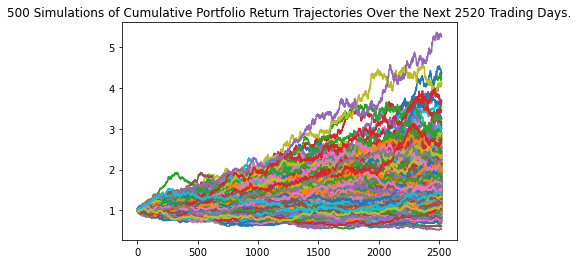

In [53]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

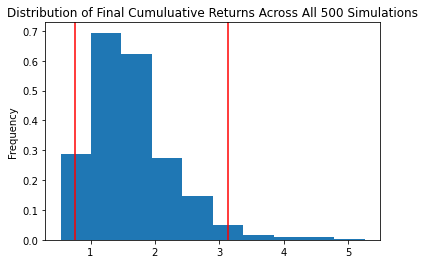

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.644678
std               0.638868
min               0.533793
25%               1.212234
50%               1.525443
75%               1.944825
max               5.262520
95% CI Lower      0.764466
95% CI Upper      3.131110
Name: 2520, dtype: float64


In [56]:
# Set initial investment
initial_investment = 20000
simulated_returns_data = {
    "mean": list(MC_tenyear.simulated_return.mean(axis=1)),
    "median": list(MC_tenyear.simulated_return.median(axis=1)),
    "min": list(MC_tenyear.simulated_return.min(axis=1)),
    "max": list(MC_tenyear.simulated_return.max(axis=1))
}
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999798,0.999461,0.977792,1.025641
2,0.999686,0.999269,0.976344,1.032676
3,0.999667,0.999526,0.970754,1.036452
4,1.000093,0.999308,0.970748,1.046560


In [57]:
cumulative_pnl = initial_investment*df_simulated_returns
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $15289.32 and $62622.2
